Генерация выборок (нормальное распределение, a = 4, b = 8):

In [20]:
import scipy.stats as sps
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

A = 4
B = 8
SIZE_FIRST = 40
SIZE_SECOND = 20

#first = np.random.normal(A, B, SIZE_FIRST)
#second = np.random.normal(B, A, SIZE_SECOND)

first = sps.norm(A, np.sqrt(B)).rvs(size=SIZE_FIRST)
second = sps.norm(B, np.sqrt(A)).rvs(size=SIZE_SECOND)

print(first)
print(second)

[ 6.83673316  6.02833349  2.06602071  6.8756508   5.37846074  5.5989972
  4.91561778  2.5267333   0.43041453  4.84968948  0.76357642  5.44087242
  3.08214405  1.66384223  3.66933513 -0.02607319 10.4048724   5.53721323
  4.66894988  3.94163737 -0.30352379  6.75433407  6.06746448  2.7917976
  0.01946024  5.67390407  7.22816335  4.40034898  2.25654011  5.97264116
  4.94314093  5.7873262   3.58496892  6.35285749  3.21481498  9.28622111
  3.12482406  2.39746295  3.65645322  4.18048713]
[ 6.91293451  4.82254593  9.38892047  5.46436113 10.81178969  4.94970401
  6.89496263  7.27219757  7.09930764  7.26043706  9.62797503  4.96838655
  8.9218598   8.34622091  4.65183189  7.61071554  7.55334712  7.07172902
  6.12791209  7.71664984]


Объединение и создание вариационного ряда:

In [21]:
joined_list = [*first, *second]
print("JOIN: ", joined_list)

sorted_list = sorted(joined_list)
print("SORTED: ", sorted_list)

JOIN:  [6.836733161384435, 6.0283334855169945, 2.06602070770426, 6.875650803175219, 5.3784607432164675, 5.598997202586317, 4.915617777106087, 2.5267333028080943, 0.43041452853468165, 4.8496894839235365, 0.7635764155631426, 5.440872420554564, 3.0821440483469535, 1.6638422338530559, 3.669335132108578, -0.026073192703775838, 10.404872397093316, 5.537213228322208, 4.668949879748692, 3.9416373739788346, -0.3035237863281255, 6.7543340703544885, 6.067464478413065, 2.791797603338721, 0.019460244286059858, 5.673904066977086, 7.228163346401583, 4.4003489802218905, 2.2565401085371968, 5.972641160536057, 4.943140931022764, 5.787326204645581, 3.584968922581607, 6.352857486872329, 3.2148149779299047, 9.286221109654921, 3.1248240593678913, 2.397462952507844, 3.656453221101069, 4.180487129033591, 6.912934512001485, 4.822545931369252, 9.388920471593039, 5.464361131467605, 10.81178969335986, 4.949704009330583, 6.894962629962062, 7.27219757295734, 7.099307638779244, 7.260437055938704, 9.627975027794824, 

Ищем выборочные характеристики:

In [22]:
max_value = np.amax(sorted_list)
min_value = np.amin(sorted_list)
n = len(sorted_list)
mean = np.mean(sorted_list)
median = np.median(sorted_list)
diff_between_max_min = max_value - min_value
variance = np.var(sorted_list)
variance_adj = np.var(sorted_list, ddof=1) #исправленная дисперсия
#sigma = np.sqrt(variance)
sigma = np.std(sorted_list)
#sigma_adj = np.sqrt(variance_adj)
sigma_adj = np.std(sorted_list, ddof=1) #исправленное отклонение

sum = 0
for a in sorted_list:
    sum += np.abs(a - mean)

srotkl = sum/n

sum = 0
for a in sorted_list:
    sum += ((a - mean) / sigma) ** 4

ekscess = ((n * (n+1)) / ((n-1)*(n-2)*(n-3)) * sum) - 3 *((n-1) ** 2) / ((n-2) * (n-3))

sum = 0
for a in sorted_list:
    sum += ((a - mean) / sigma) ** 3

skos = n / ((n-1)*(n-2)) * sum


print("MIN: ", min_value, "\nMAX:", max_value,"\nОБЪЕМ ВЫБОРКИ:", n,"\nВЫБОРОЧНОЕ СРЕДНЕЕ:", mean,"\nМЕДИАНА:",
 median,"\nРАЗМАХ: ", diff_between_max_min,"\nДИСПЕРСИЯ: ", variance, "\nИСПРАВЛЕННАЯ ДИСПЕРСИЯ: ",variance_adj,
 "\nСР КВ ОТКЛ: ", sigma, "\nСР КВ ОТЛ ИСПР: ", sigma_adj, "\nсреднее абсолютное отклонение от выборочного среднего: ", srotkl,
 "\nэксцесс эмпирического распределения: ", ekscess, "\nасимметрия эмпирического распределения: ", skos)

MIN:  -0.3035237863281255 
MAX: 10.81178969335986 
ОБЪЕМ ВЫБОРКИ: 60 
ВЫБОРОЧНОЕ СРЕДНЕЕ: 5.258608280449282 
МЕДИАНА: 5.452616776011085 
РАЗМАХ:  11.115313479687984 
ДИСПЕРСИЯ:  6.591044340181578 
ИСПРАВЛЕННАЯ ДИСПЕРСИЯ:  6.7027569561168585 
СР КВ ОТКЛ:  2.567302931128615 
СР КВ ОТЛ ИСПР:  2.5889683188708315 
среднее абсолютное отклонение от выборочного среднего:  2.0343300145339165 
эксцесс эмпирического распределения:  -0.09929519673185228 
асимметрия эмпирического распределения:  -0.17887329640062496


Гистограмма:

21
0.529300641889904
[-0.3035237863281255, 0.2257768555617785, 0.7550774974516825, 1.2843781393415865, 1.8136787812314905, 2.3429794231213945, 2.8722800650112985, 3.4015807069012025, 3.9308813487911065, 4.4601819906810105, 4.9894826325709145, 5.5187832744608185, 6.0480839163507225, 6.5773845582406265, 7.1066852001305305, 7.6359858420204345, 8.16528648391034, 8.694587125800243, 9.223887767690147, 9.753188409580051, 10.282489051469955, 10.81178969335986]
[3 1 1 1 2 3 3 3 3 8 3 6 3 7 5 1 1 1 3 0 2]


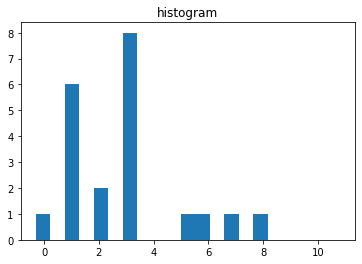

In [24]:
n_log_2 = np.log2(n)
num_of_intervals = round(1 + 3.322 * n_log_2)
print(num_of_intervals)
interval_step = (max_value - min_value) / num_of_intervals
print(interval_step)
bins = []
bins.append(min_value)
for i in range(num_of_intervals):
    bins.append(bins[i] + interval_step)
print(bins)
hist,bins = np.histogram(sorted_list, bins= bins)
print(hist)
plt.hist(hist, bins) 
plt.title("histogram") 
plt.show()

#his = np.histogram(sorted_list)

Относительные частоты и гистограмма:

[0.05, 0.016666666666666666, 0.016666666666666666, 0.016666666666666666, 0.03333333333333333, 0.05, 0.05, 0.05, 0.05, 0.13333333333333333, 0.05, 0.1, 0.05, 0.11666666666666667, 0.08333333333333333, 0.016666666666666666, 0.016666666666666666, 0.016666666666666666, 0.05, 0.0, 0.03333333333333333]
1.0


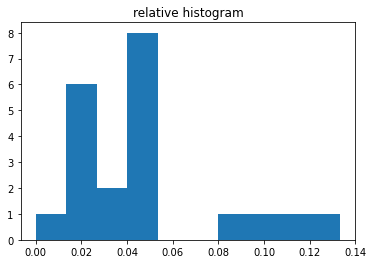

In [29]:
relatively_hist = []
sum = 0
for i in range(num_of_intervals):
    relatively_hist.append(hist[i] / n)
    sum += relatively_hist[i]

print(relatively_hist)
print(round(sum,15))

plt.hist(relatively_hist)
plt.title("relative histogram") 
plt.show()

Плотности относительных частот, полигон:

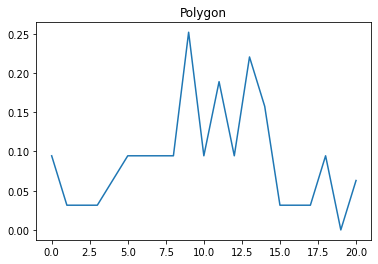

In [30]:
relative_friq_density = []
for i in range(num_of_intervals):
    relative_friq_density.append(relatively_hist[i] / interval_step)

#plt.hist(relative_friq_density)
plt.figure()
plt.plot(relative_friq_density)
plt.title("Polygon") 
plt.show()

Кумулятивные (интегральные) частоты:

In [31]:
cumulative_density = []
cumulative_density.append(0)
for i in range(num_of_intervals):
    cumulative_density.append(cumulative_density[i] + hist[i])

print(hist)
print(cumulative_density)

[3 1 1 1 2 3 3 3 3 8 3 6 3 7 5 1 1 1 3 0 2]
[0, 3, 4, 5, 6, 8, 11, 14, 17, 20, 28, 31, 37, 40, 47, 52, 53, 54, 55, 58, 58, 60]


Относительные кумулятивные частоты:

[0.0, 0.05, 0.06666666666666667, 0.08333333333333333, 0.1, 0.13333333333333333, 0.18333333333333332, 0.23333333333333334, 0.2833333333333333, 0.3333333333333333, 0.4666666666666667, 0.5166666666666667, 0.6166666666666667, 0.6666666666666666, 0.7833333333333333, 0.8666666666666667, 0.8833333333333333, 0.9, 0.9166666666666666, 0.9666666666666667, 0.9666666666666667, 1.0]


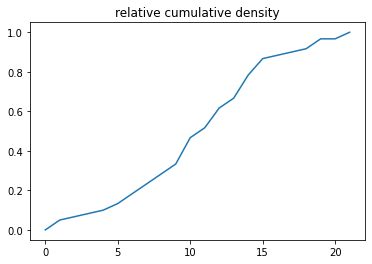

In [36]:
relative_cumulative_density = []
for i in range(len(cumulative_density)):
    relative_cumulative_density.append(cumulative_density[i] / n)

print(relative_cumulative_density)
plt.figure()
plt.plot(relative_cumulative_density)
#plt.hist(relative_cumulative_density)
plt.title("relative cumulative density") 
plt.show()